In [1]:
import os
import pickle

import numpy as np
import scipy.stats as st
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

from npc_sessions import DynamicRoutingSession

%matplotlib widget

# from sklearn import ensemble, svm
# from sklearn.metrics import balanced_accuracy_score, classification_report
# from sklearn.model_selection import StratifiedKFold
# from sklearn.preprocessing import RobustScaler, StandardScaler

# import npc_lims
# from npc_sessions import DynamicRoutingSession
# from dynamic_routing_analysis import spike_utils, decoding_utils


In [2]:
loadpath=r"\\allen\programs\mindscope\workgroups\templeton\TTOC\decoding results\multi_shuffled_blocks"
decoder_results=os.listdir(loadpath)

In [28]:
# decoder_results

In [3]:
n_block_repeats=100

results_dict={
    'session_id':[],
    'project':[],
    'structure':[],
    'percentile_95':[],
    'percentile_99':[],
    'diff_in_stdev':[],
    'n_units':[],
    'block_multiplier':[],
    'null_distribution_median':[],
    'null_distribution_std':[],
    'test_distribution_median':[],
}

for ii,ff in enumerate(decoder_results[:]):

    # ff=decoder_results[0]
    if ff.endswith('.pkl'):
        with open(os.path.join(loadpath,ff),'rb') as handle:
            svc_results=pickle.load(handle)
        print(ff)
    else:
        continue

    #session id
    session_id=svc_results['session_info'].id
    project=svc_results['session_info'].project

    #loop over block multipliers
    block_multipliers=[x for x in svc_results.keys() if type(x) is int]
    for block_multiplier in block_multipliers:
        # block_multiplier=1

        #loop over areas
        areas = [x for x in svc_results[block_multiplier].keys() if 'block_index' not in x and 'pred_var' not in x]
        for aa in areas:
            # aa=areas[0]
            n_units=svc_results[block_multiplier][aa]['n_units']

            # collect the data in a useful shape
            all_bal_acc_real=np.full((n_block_repeats),fill_value=np.nan)
            all_bal_acc_pseudo=np.full((n_block_repeats),fill_value=np.nan)
            for xx in range(0,n_block_repeats):
                all_bal_acc_real[xx]=svc_results[block_multiplier][aa]['real'][xx]['balanced_accuracy']
                all_bal_acc_pseudo[xx]=svc_results[block_multiplier][aa]['pseudo'][xx]['balanced_accuracy']

            test_median=np.median(all_bal_acc_real)
            null_median=np.median(all_bal_acc_pseudo)
            null_std=np.std(all_bal_acc_pseudo)
            diff_in_std=(test_median-null_median)/null_std
            percentile_95=np.percentile(all_bal_acc_pseudo,95)
            percentile_99=np.percentile(all_bal_acc_pseudo,99)

            results_dict['block_multiplier'].append(block_multiplier)
            results_dict['session_id'].append(session_id)
            results_dict['project'].append(project)
            results_dict['structure'].append(aa)
            results_dict['percentile_95'].append(percentile_95)
            results_dict['percentile_99'].append(percentile_99)
            results_dict['diff_in_stdev'].append(diff_in_std)
            results_dict['n_units'].append(n_units)
            results_dict['null_distribution_median'].append(null_median)
            results_dict['test_distribution_median'].append(test_median)
            results_dict['null_distribution_std'].append(null_std)



620263_2022-07-26_0_multi_shuffled_blocks.pkl
620263_2022-07-27_0_multi_shuffled_blocks.pkl
620264_2022-08-02_0_multi_shuffled_blocks.pkl
626791_2022-08-15_0_multi_shuffled_blocks.pkl
626791_2022-08-17_0_multi_shuffled_blocks.pkl
628801_2022-09-19_0_multi_shuffled_blocks.pkl
636397_2022-09-26_0_multi_shuffled_blocks.pkl
636397_2022-09-27_0_multi_shuffled_blocks.pkl
636766_2023-01-23_0_multi_shuffled_blocks.pkl
636766_2023-01-24_0_multi_shuffled_blocks.pkl
636766_2023-01-25_0_multi_shuffled_blocks.pkl
636766_2023-01-26_0_multi_shuffled_blocks.pkl
644547_2022-12-05_0_multi_shuffled_blocks.pkl
644547_2022-12-06_0_multi_shuffled_blocks.pkl
644864_2023-01-30_0_multi_shuffled_blocks.pkl
644864_2023-01-31_0_multi_shuffled_blocks.pkl
644864_2023-02-01_0_multi_shuffled_blocks.pkl
644864_2023-02-02_0_multi_shuffled_blocks.pkl
644866_2023-02-07_0_multi_shuffled_blocks.pkl
644866_2023-02-09_0_multi_shuffled_blocks.pkl
644866_2023-02-10_0_multi_shuffled_blocks.pkl
644867_2023-02-20_0_multi_shuffled

In [4]:
results_df=pd.DataFrame.from_dict(results_dict)
results_df.to_csv(os.path.join(loadpath,'processed','multi_block_results_new.csv'))
results_df

,session_id,project,structure,percentile_95,percentile_99,diff_in_stdev,n_units,block_multiplier,null_distribution_median,null_distribution_std,test_distribution_median
0,620263_2022-07-26,TempletonPilotSession,all,0.967120,0.970280,-1.549786,1026,1,0.855554,0.065326,0.754313
1,620263_2022-07-26,TempletonPilotSession,CA1_probeC,0.931138,0.938803,-1.211509,163,1,0.776982,0.080105,0.679935
2,620263_2022-07-26,TempletonPilotSession,ACAv,0.889438,0.895327,-0.962875,152,1,0.732723,0.079677,0.656004
3,620263_2022-07-26,TempletonPilotSession,DG,0.921980,0.926650,-1.074380,128,1,0.743182,0.077298,0.660135
4,620263_2022-07-26,TempletonPilotSession,TEa,0.896450,0.907383,-1.098228,124,1,0.732804,0.072177,0.653537
...,...,...,...,...,...,...,...,...,...,...,...
8353,690706_2023-11-30,DynamicRouting,IGL,0.578345,0.598336,9.371147,27,10,0.525764,0.031851,0.824249
8354,690706_2023-11-30,DynamicRouting,RSPv,0.583890,0.624488,4.268738,27,10,0.533659,0.037169,0.692322
8355,690706_2023-11-30,DynamicRouting,DG_probeA,0.615098,0.676912,6.723449,23,10,0.540548,0.041140,0.817151
8356,690706_2023-11-30,DynamicRouting,PRE,0.581943,0.601240,1.860353,23,10,0.527297,0.031888,0.586619


In [46]:
# #load saved results
# results_df=pd.read_csv(os.path.join(loadpath,'processed','multi_block_results_new.csv'))
# results_df

,Unnamed: 0,session_id,project,structure,percentile_95,diff_in_stdev,n_units,block_multiplier,null_distribution_median,null_distribution_std,test_distribution_median
0,0,620263_2022-07-26_0,TempletonPilotSession,all,0.967120,-1.549786,1026,1,0.855554,0.065326,0.754313
1,1,620263_2022-07-26_0,TempletonPilotSession,CA1_probeC,0.931138,-1.211509,163,1,0.776982,0.080105,0.679935
2,2,620263_2022-07-26_0,TempletonPilotSession,ACAv,0.889438,-0.962875,152,1,0.732723,0.079677,0.656004
3,3,620263_2022-07-26_0,TempletonPilotSession,DG,0.921980,-1.074380,128,1,0.743182,0.077298,0.660135
4,4,620263_2022-07-26_0,TempletonPilotSession,TEa,0.896450,-1.098228,124,1,0.732804,0.072177,0.653537
...,...,...,...,...,...,...,...,...,...,...,...
6409,6409,681532_2023-10-18_0,DynamicRouting,DG_probeD,0.575673,1.275325,46,10,0.521505,0.032130,0.562482
6410,6410,681532_2023-10-18_0,DynamicRouting,ProS_probeD,0.602548,2.592936,42,10,0.546376,0.034251,0.635186
6411,6411,681532_2023-10-18_0,DynamicRouting,POL,0.574765,3.113038,42,10,0.528318,0.033639,0.633038
6412,6412,681532_2023-10-18_0,DynamicRouting,DG_probeB,0.594536,1.350805,42,10,0.540278,0.031703,0.583103


In [54]:
# #load saved results
# results_exp_dist_df=pd.read_csv(r"\\allen\programs\mindscope\workgroups\templeton\TTOC\decoding results\exponential_shuffled_blocks\processed\exponential_block_results.csv")
# results_exp_dist_df

,Unnamed: 0,session_id,project,structure,percentile_95,percentile_99,diff_in_stdev,n_units,block_multiplier,null_distribution_median,null_distribution_std,test_distribution_median
0,0,620263_2022-07-26_0,TempletonPilotSession,all,0.760705,0.769774,1.824103,1026,1,0.697318,0.033092,0.757682
1,1,620263_2022-07-26_0,TempletonPilotSession,CA1_probeC,0.719475,0.739166,0.760653,163,1,0.666819,0.025578,0.686275
2,2,620263_2022-07-26_0,TempletonPilotSession,ACAv,0.650951,0.704164,1.771241,152,1,0.611115,0.026456,0.657976
3,3,620263_2022-07-26_0,TempletonPilotSession,DG,0.655361,0.678712,1.805692,128,1,0.603442,0.032251,0.661677
4,4,620263_2022-07-26_0,TempletonPilotSession,TEa,0.653639,0.685043,2.145214,124,1,0.576588,0.037120,0.656220
...,...,...,...,...,...,...,...,...,...,...,...,...
261,261,670248_2023-08-01_0,TempletonPilotSession,DG_probeC,0.583660,0.591428,1.436573,28,1,0.509768,0.039098,0.565936
262,262,670248_2023-08-01_0,TempletonPilotSession,MOs_probeA,0.556718,0.563085,-1.383290,27,1,0.510890,0.029539,0.470029
263,263,670248_2023-08-01_0,TempletonPilotSession,DG_probeB,0.567429,0.578262,-0.310288,26,1,0.517925,0.033267,0.507602
264,264,670248_2023-08-01_0,TempletonPilotSession,HPF,0.608156,0.631306,0.095344,21,1,0.542589,0.040924,0.546491


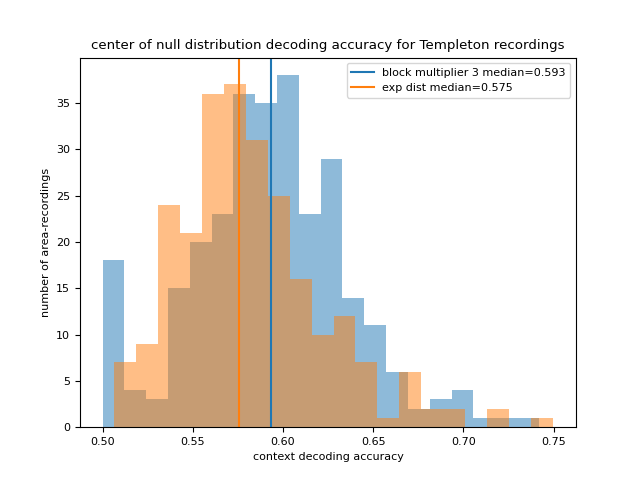

In [61]:
# svc_results[1].keys()
block_multiplier=3
null_dist_block_mult=results_df.query('structure!="all" and project=="TempletonPilotSession" and block_multiplier==@block_multiplier')['null_distribution_median']
null_dist_exp_dist=results_exp_dist_df.query('structure!="all" and project=="TempletonPilotSession" and block_multiplier==1')['null_distribution_median']


fig,ax=plt.subplots()
ax.hist(null_dist_block_mult,bins=20,alpha=0.5)
block_mult_median=ax.axvline(null_dist_block_mult.median(),color='tab:blue')
ax.hist(null_dist_exp_dist,bins=20,alpha=0.5)
exp_dist_median=ax.axvline(null_dist_exp_dist.median(),color='tab:orange')
ax.set_title('center of null distribution decoding accuracy for Templeton recordings')
ax.set_xlabel('context decoding accuracy')
ax.set_ylabel('number of area-recordings')
ax.legend([block_mult_median,exp_dist_median],
          ['block multiplier '+str(block_multiplier)+' median='+str(np.round(null_dist_block_mult.median(),decimals=3)),
           'exp dist median='+str(np.round(null_dist_exp_dist.median(),decimals=3))])

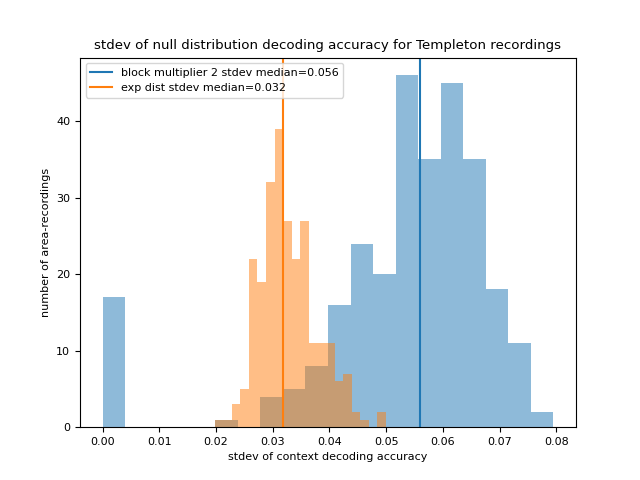

In [64]:
# svc_results[1].keys()
block_multiplier=2
null_dist_block_mult=results_df.query('structure!="all" and project=="TempletonPilotSession" and block_multiplier==@block_multiplier')['null_distribution_std']
null_dist_exp_dist=results_exp_dist_df.query('structure!="all" and project=="TempletonPilotSession" and block_multiplier==1')['null_distribution_std']


fig,ax=plt.subplots()
ax.hist(null_dist_block_mult,bins=20,alpha=0.5)
block_mult_median=ax.axvline(null_dist_block_mult.median(),color='tab:blue')
ax.hist(null_dist_exp_dist,bins=20,alpha=0.5)
exp_dist_median=ax.axvline(null_dist_exp_dist.median(),color='tab:orange')
ax.set_title('stdev of null distribution decoding accuracy for Templeton recordings')
ax.set_xlabel('stdev of context decoding accuracy')
ax.set_ylabel('number of area-recordings')
ax.legend([block_mult_median,exp_dist_median],
          ['block multiplier '+str(block_multiplier)+' stdev median='+str(np.round(null_dist_block_mult.median(),decimals=3)),
           'exp dist stdev median='+str(np.round(null_dist_exp_dist.median(),decimals=3))])

In [ ]:
# block_multiplier=1
# [x for x in svc_results[block_multiplier].keys() if 'block_index' not in x and 'pred_var' not in x]
# [x for x in svc_results.keys() if type(x) is int]

In [5]:
templeton_results=results_df.query('project.str.contains("Templeton")')

Text(0.5, 0, 'block multiplier')

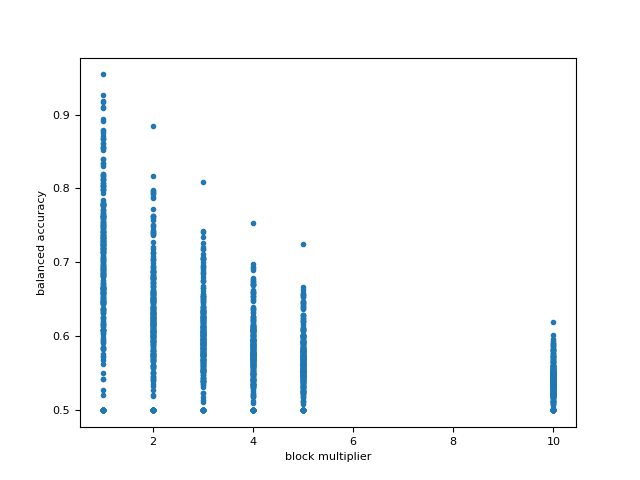

In [6]:
fig,ax=plt.subplots()
ax.plot(templeton_results['block_multiplier'],templeton_results['null_distribution_median'],'.')
ax.set_ylabel('balanced accuracy')
ax.set_xlabel('block multiplier')

In [ ]:
fig,ax=plt.subplots()
# ax.boxplot(templeton_results['test_distribution_median'],positions=[0])
for bb in templeton_results['block_multiplier'].unique():
    ax.boxplot(templeton_results.query('block_multiplier==@bb')['null_distribution_median'],positions=[bb])
# ax.boxplot(templeton_results['block_multiplier'],templeton_results['null_distribution_median'],'.')
ax.set_ylabel('balanced accuracy')
ax.set_xlabel('block multiplier')

In [ ]:
fig,ax=plt.subplots()
ax.plot(templeton_results.query('block_multiplier==3')['n_units'],templeton_results.query('block_multiplier==3')['null_distribution_median'],'.')
ax.set_ylabel('balanced accuracy')
ax.set_xlabel('n_units')

In [ ]:
templeton_results_test_decoding=templeton_results.query('block_multiplier==1')[['structure','test_distribution_median','n_units']]
for ii in ['A','B','C','D','E','F']:
    templeton_results_test_decoding['structure']=templeton_results_test_decoding['structure'].str.replace('_probe'+ii,'')


n_recs_threshold=2

n_recs={}
area_test_decoding={
    'structure':[],
    'test_decoding':[],
    'test_decoding_std':[],
    'n_recs':[],
    'mean_n_units':[],
}
area_test_decoding_std={}

for aa in templeton_results_test_decoding['structure'].unique():
    
    n_recs[aa]=len(templeton_results_test_decoding.query('structure==@aa'))

    test_decoding=np.mean(templeton_results_test_decoding.query('structure==@aa')['test_distribution_median'])
    test_decoding_std=st.sem(templeton_results_test_decoding.query('structure==@aa')['test_distribution_median'],nan_policy='omit')

    if n_recs[aa]>=n_recs_threshold:
        area_test_decoding['structure'].append(aa)
        area_test_decoding['test_decoding'].append(test_decoding)
        area_test_decoding['test_decoding_std'].append(test_decoding_std)
        area_test_decoding['n_recs'].append(n_recs[aa])
        area_test_decoding['mean_n_units'].append(np.mean(templeton_results_test_decoding.query('structure==@aa')['n_units']))

    else:
        continue

area_test_decoding_df=pd.DataFrame(area_test_decoding)
area_test_decoding_df.sort_values(by='test_decoding',ascending=False,inplace=True)
area_test_decoding_df

NameError: name 'area_test_decoding_df' is not defined

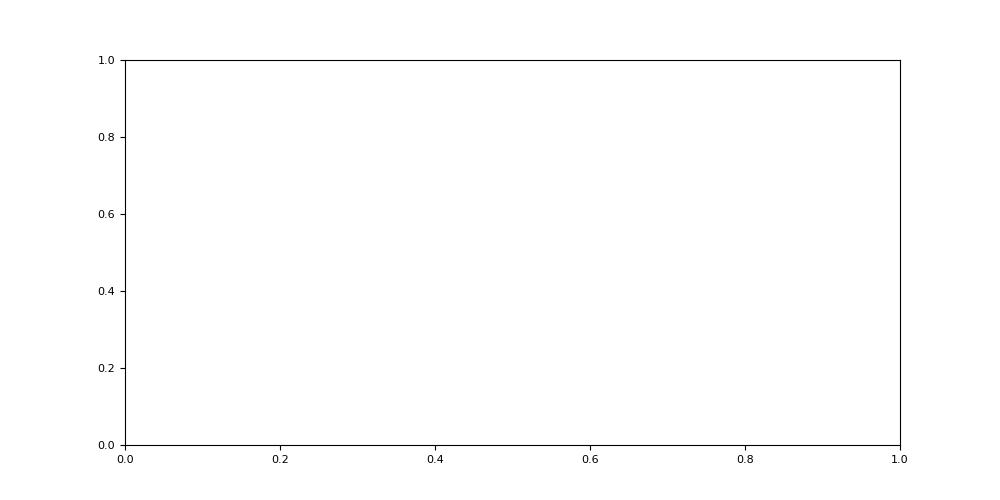

In [8]:
fig,ax=plt.subplots(figsize=(10,5))

area_label=[]
for aa in area_test_decoding_df['structure'].values:
    area_label.append(aa+' ('+str(n_recs[aa])+')')

area_test_decoding_df['test_decoding'].plot.bar(ax=ax,yerr=area_test_decoding_df['test_decoding_std'])
ax.set_ylabel('context decoding accuracy')
ax.set_xticklabels(area_label)
ax.set_ylim([0.5,1])
ax.set_title('Templeton recordings')
fig.tight_layout()

In [10]:
dr_results_test_decoding=results_df.query('block_multiplier==1 and project.str.contains("DynamicRouting")')[['structure','test_distribution_median','n_units']]
for ii in ['A','B','C','D','E','F']:
    dr_results_test_decoding['structure']=dr_results_test_decoding['structure'].str.replace('_probe'+ii,'')

dr_n_recs=[]
dr_test_decoding=[]
dr_test_decoding_std=[]
dr_mean_n_units=[]


for aa in dr_results_test_decoding['structure']:
    n_recs=len(dr_results_test_decoding.query('structure==@aa'))
    test_decoding=np.nanmean(dr_results_test_decoding.query('structure==@aa')['test_distribution_median'])
    test_decoding_std=st.sem(dr_results_test_decoding.query('structure==@aa')['test_distribution_median'],nan_policy='omit')

    # if n_recs>=n_recs_threshold:
    dr_n_recs.append(n_recs)
    dr_test_decoding.append(test_decoding)
    dr_test_decoding_std.append(test_decoding_std)
    dr_mean_n_units.append(np.mean(dr_results_test_decoding.query('structure==@aa')['n_units']))

    # else:
    #     dr_n_recs.append(n_recs)
    #     dr_test_decoding.append(np.nan)
    #     dr_test_decoding_std.append(np.nan)
    #     dr_mean_n_units.append(np.mean(dr_results_test_decoding.query('structure==@aa')['n_units']))
    #     continue

area_test_decoding_df['dr_test_decoding']=dr_test_decoding
area_test_decoding_df['dr_test_decoding_std']=dr_test_decoding_std 
area_test_decoding_df['dr_n_recs']=dr_n_recs
area_test_decoding_df['dr_mean_n_units']=dr_mean_n_units

area_test_decoding_df

c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


NameError: name 'area_test_decoding_df' is not defined

In [ ]:
area_test_decoding_df.sort_values(by='dr_test_decoding',ascending=False,inplace=True)

fig,ax=plt.subplots(figsize=(10,5))

area_label=[]
for aa in area_test_decoding_df['structure'].values:
    area_label.append(aa)#+' ('+str(n_recs[aa])+')')

# area_test_decoding_df['test_decoding'].plot.bar(ax=ax,yerr=area_test_decoding_df['test_decoding_std'])
# area_test_decoding_df['dr_test_decoding'].plot.bar(ax=ax,yerr=area_test_decoding_df['dr_test_decoding_std'])
ax.bar(x=np.arange(0,len(area_test_decoding_df))+0.25,height=area_test_decoding_df['test_decoding'],yerr=area_test_decoding_df['test_decoding_std'],label='Templeton',width=0.25)
ax.bar(x=np.arange(0,len(area_test_decoding_df))-0.25,height=area_test_decoding_df['dr_test_decoding'],yerr=area_test_decoding_df['dr_test_decoding_std'],label='DR',width=0.25)
ax.set_ylabel('context decoding accuracy')
ax.set_xticks(np.arange(0,len(area_test_decoding_df)))
ax.set_xticklabels(area_label,rotation=90)
ax.set_ylim([0.5,1])
ax.set_title('Templeton vs. DR recordings')
ax.legend()
fig.tight_layout()

In [ ]:
block_multipliers=templeton_results['block_multiplier'].unique()
false_positive_rate=[]
for block_multiplier in block_multipliers:
    false_positive_rate.append(
        np.mean(templeton_results.query('block_multiplier==@block_multiplier')['test_distribution_median']>
        templeton_results.query('block_multiplier==@block_multiplier')['percentile_95'])
    )
false_positive_rate

In [ ]:
fig,ax=plt.subplots()
ax.bar(np.arange(len(block_multipliers)),false_positive_rate,)
ax.set_xticks(np.arange(len(block_multipliers)))
ax.set_xticklabels(block_multipliers)
ax.set_ylabel('false positive rate')
ax.set_xlabel('block multiplier')

In [ ]:
templ_sub_results=results_df.query('project.str.contains("Templeton") and block_multiplier==2')
#remove the "_probe" from the area name
for ii in ['A','B','C','D','E','F']:
    templ_sub_results['structure']=templ_sub_results['structure'].str.replace('_probe'+ii,'')

In [ ]:
n_recs_threshold=2
area_significant_decoding={}
n_recs={}

for aa in templ_sub_results['structure'].unique():
    
    n_recs[aa]=len(templ_sub_results.query('structure==@aa'))

    sig_decoding=(
        np.mean(templ_sub_results.query('structure==@aa')['test_distribution_median']>
        templ_sub_results.query('structure==@aa')['percentile_95'])
    )
    if n_recs[aa]>=n_recs_threshold:
        area_significant_decoding[aa]=sig_decoding
    else:
        continue

area_significant_decoding

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
area_sig_decoding_df=pd.DataFrame.from_dict(area_significant_decoding,orient='index',columns=['sig_decoding'])
area_sig_decoding_df['n_recs']=n_recs
area_sig_decoding_df.sort_values(by='sig_decoding',ascending=False,inplace=True)
area_label=[]
for aa in area_sig_decoding_df.index:
    area_label.append(aa+' ('+str(n_recs[aa])+')')

area_sig_decoding_df['sig_decoding'].plot.bar(ax=ax)
ax.set_ylabel('rate of significant context decoding')
ax.set_xticklabels(area_label)
ax.set_ylim([0,1])
ax.set_title('Templeton recordings')
fig.tight_layout()


In [ ]:
n_recs_threshold=2
area_std_diff={}
n_recs={}

for aa in templ_sub_results['structure'].unique():
    
    n_recs[aa]=len(templ_sub_results.query('structure==@aa'))

    std_diff=(
        np.mean(templ_sub_results.query('structure==@aa')['diff_in_stdev'])
    )
    if n_recs[aa]>=n_recs_threshold:
        area_std_diff[aa]=std_diff
    else:
        continue

area_std_diff

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
area_std_diff_df=pd.DataFrame.from_dict(area_std_diff,orient='index',columns=['std_diff'])
area_std_diff_df['n_recs']=n_recs
area_std_diff_df.sort_values(by='std_diff',ascending=False,inplace=True)
area_label=[]
for aa in area_std_diff_df.index:
    area_label.append(aa+' ('+str(n_recs[aa])+')')

area_std_diff_df['std_diff'].plot.bar(ax=ax)
ax.set_ylabel('decoder accuracy difference from null distribution')
ax.set_xticklabels(area_label)
ax.set_title('Templeton recordings')
ax.set_ylim([0,5])
fig.tight_layout()


In [11]:
dr_results=results_df.query('project.str.contains("DynamicRouting") and block_multiplier==2')
#remove the "_probe" from the area name
for ii in ['A','B','C','D','E','F']:
    dr_results['structure']=dr_results['structure'].str.replace('_probe'+ii,'')

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_9808\392040865.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_results['structure']=dr_results['structure'].str.replace('_probe'+ii,'')


In [12]:
dr_results['structure'].unique()
dr_results

,session_id,project,structure,percentile_95,percentile_99,diff_in_stdev,n_units,block_multiplier,null_distribution_median,null_distribution_std,test_distribution_median
226,626791_2022-08-15,DynamicRouting,all,0.894686,0.929641,0.883174,1608,2,0.788494,0.057090,0.838914
227,626791_2022-08-15,DynamicRouting,CA1,0.761993,0.817486,0.776535,171,2,0.638388,0.058199,0.683582
228,626791_2022-08-15,DynamicRouting,CP,0.738727,0.768343,0.381564,155,2,0.637627,0.047175,0.655628
229,626791_2022-08-15,DynamicRouting,LGd,0.766046,0.791223,-0.032429,136,2,0.663809,0.055152,0.662020
230,626791_2022-08-15,DynamicRouting,MOs,0.851858,0.913094,-0.214865,133,2,0.718523,0.063855,0.704803
...,...,...,...,...,...,...,...,...,...,...,...
8273,690706_2023-11-30,DynamicRouting,IGL,0.728529,0.754897,3.188235,27,2,0.613801,0.065495,0.822615
8274,690706_2023-11-30,DynamicRouting,RSPv,0.772964,0.804312,0.766808,27,2,0.637251,0.073135,0.693332
8275,690706_2023-11-30,DynamicRouting,DG,0.799968,0.843563,2.117251,23,2,0.659407,0.074903,0.817995
8276,690706_2023-11-30,DynamicRouting,PRE,0.727201,0.788486,0.036214,23,2,0.581332,0.063360,0.583626


In [23]:
dr_results_test_decoding=results_df.query('block_multiplier==2 and project.str.contains("DynamicRouting")')[['structure','test_distribution_median','n_units']]
for ii in ['A','B','C','D','E','F']:
    dr_results_test_decoding['structure']=dr_results_test_decoding['structure'].str.replace('_probe'+ii,'')

n_recs_threshold=2

n_recs={}
area_test_decoding={
    'structure':[],
    'test_decoding':[],
    'test_decoding_std':[],
    'n_recs':[],
    'mean_n_units':[],
}
area_test_decoding_std={}

for aa in dr_results_test_decoding['structure'].unique():
    
    n_recs[aa]=len(dr_results_test_decoding.query('structure==@aa'))

    test_decoding=np.mean(dr_results_test_decoding.query('structure==@aa')['test_distribution_median'])
    test_decoding_std=st.sem(dr_results_test_decoding.query('structure==@aa')['test_distribution_median'])

    if n_recs[aa]>=n_recs_threshold:
        area_test_decoding['structure'].append(aa)
        area_test_decoding['test_decoding'].append(test_decoding)
        area_test_decoding['test_decoding_std'].append(test_decoding_std)
        area_test_decoding['n_recs'].append(n_recs[aa])
        area_test_decoding['mean_n_units'].append(np.mean(dr_results_test_decoding.query('structure==@aa')['n_units']))

    else:
        continue

area_test_decoding_df=pd.DataFrame(area_test_decoding)
area_test_decoding_df.sort_values(by='test_decoding',ascending=False,inplace=True)
area_test_decoding_df

c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


,structure,test_decoding,test_decoding_std,n_recs,mean_n_units
0,all,0.859610,0.006904,58,1555.172414
68,PRNr,0.834017,0.000050,2,44.000000
14,IGL,0.792125,0.030490,2,26.000000
71,EPd,0.775215,0.066922,2,31.500000
88,ccg,0.774495,0.018605,3,42.333333
...,...,...,...,...,...
42,MGm,0.609044,0.025271,4,63.250000
24,VISli,0.594866,0.020561,4,73.250000
30,PRE,0.592059,0.011341,5,66.800000
74,SCop,0.591765,0.022792,2,20.500000


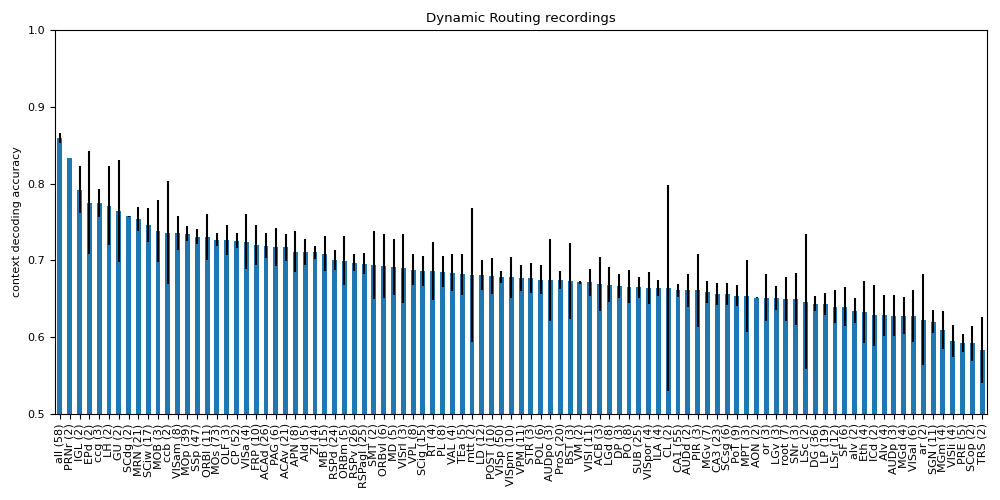

In [24]:
fig,ax=plt.subplots(figsize=(10,5))

area_label=[]
for aa in area_test_decoding_df['structure'].values:
    area_label.append(aa+' ('+str(n_recs[aa])+')')

area_test_decoding_df['test_decoding'].plot.bar(ax=ax,yerr=area_test_decoding_df['test_decoding_std'])
ax.set_ylabel('context decoding accuracy')
ax.set_xticklabels(area_label)
ax.set_ylim([0.5,1])
ax.set_title('Dynamic Routing recordings')
fig.tight_layout()

In [28]:
# dr_results.query('structure=="IGL"')


In [21]:
n_recs_threshold=4
area_significant_decoding={}
n_recs={}

for aa in dr_results['structure'].unique():
    
    n_recs[aa]=len(dr_results.query('structure==@aa'))

    sig_decoding=(
        np.mean(dr_results.query('structure==@aa')['test_distribution_median']>
        dr_results.query('structure==@aa')['percentile_95'])
    )
    if n_recs[aa]>=n_recs_threshold:
        area_significant_decoding[aa]=sig_decoding
    else:
        continue

area_significant_decoding

{'all': 0.46551724137931033,
 'CA1': 0.09090909090909091,
 'CP': 0.5,
 'LGd': 0.125,
 'MOs': 0.3698630136986301,
 'VISpm': 0.2,
 'PO': 0.125,
 'VPM': 0.0,
 'LP': 0.10526315789473684,
 'DG': 0.1111111111111111,
 'LD': 0.16666666666666666,
 'RSPd': 0.2916666666666667,
 'ZI': 0.25,
 'MOp': 0.28205128205128205,
 'PoT': 0.1111111111111111,
 'VISp': 0.1,
 'VISam': 0.375,
 'TEa': 0.2,
 'SGN': 0.0,
 'VISli': 0.0,
 'SUB': 0.24,
 'AId': 0.4,
 'AIv': 0.0,
 'PRE': 0.0,
 'LSr': 0.25,
 'RSPv': 0.23076923076923078,
 'SF': 0.0,
 'MRN': 0.7142857142857143,
 'POL': 0.0,
 'POST': 0.3,
 'VISa': 0.0,
 'RSPagl': 0.28,
 'ILA': 0.0,
 'ORBm': 0.6,
 'VISl': 0.36363636363636365,
 'MGm': 0.0,
 'APN': 0.375,
 'SCig': 0.26666666666666666,
 'SCiw': 0.35294117647058826,
 'ProS': 0.15,
 'MB': 0.4666666666666667,
 'CA3': 0.043478260869565216,
 'MD': 0.2,
 'ACAd': 0.5,
 'ACAv': 0.38095238095238093,
 'SSp': 0.3617021276595745,
 'MGv': 0.0,
 'Eth': 0.0,
 'MGd': 0.0,
 'RT': 0.25,
 'VISpor': 0.0,
 'VPL': 0.125,
 'VAL': 0.25

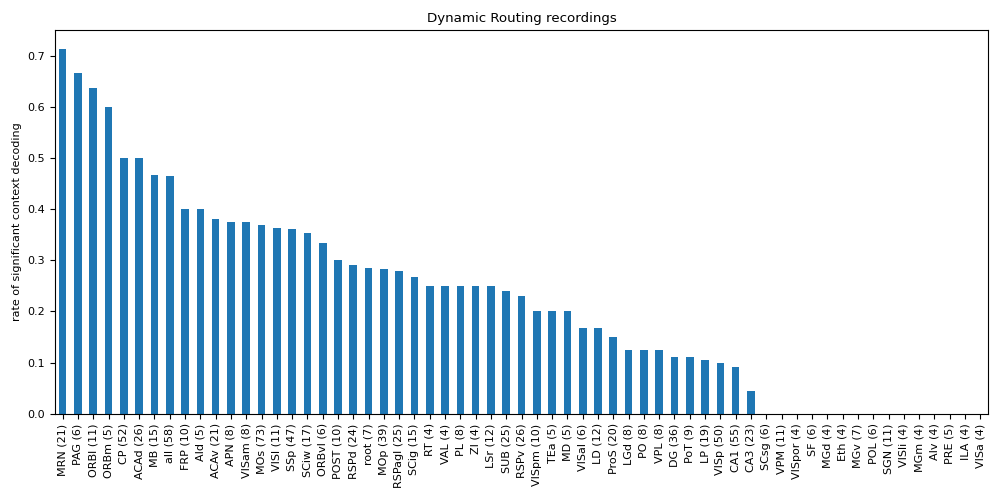

In [22]:
fig,ax=plt.subplots(figsize=(10,5))
area_sig_decoding_df=pd.DataFrame.from_dict(area_significant_decoding,orient='index',columns=['sig_decoding'])
area_sig_decoding_df['n_recs']=n_recs
area_sig_decoding_df.sort_values(by='sig_decoding',ascending=False,inplace=True)
area_label=[]
for aa in area_sig_decoding_df.index:
    area_label.append(aa+' ('+str(n_recs[aa])+')')

area_sig_decoding_df['sig_decoding'].plot.bar(ax=ax)
ax.set_ylabel('rate of significant context decoding')
ax.set_xticklabels(area_label)
ax.set_title('Dynamic Routing recordings')
fig.tight_layout()


In [25]:
n_recs_threshold=4
area_std_diff={}
n_recs={}

for aa in dr_results['structure'].unique():
    
    n_recs[aa]=len(dr_results.query('structure==@aa'))

    std_diff=(
        np.mean(dr_results.query('structure==@aa')['diff_in_stdev'])
    )
    if n_recs[aa]>=n_recs_threshold:
        area_std_diff[aa]=std_diff
    else:
        continue

area_std_diff

{'all': 1.523350975879387,
 'CA1': 0.6434992413257701,
 'CP': 1.8584057267166592,
 'LGd': 0.6884483255058307,
 'MOs': 1.421831746943244,
 'VISpm': 0.9625111852936546,
 'PO': 1.1173831756789285,
 'VPM': 0.7341653864792895,
 'LP': 0.7029833475089184,
 'DG': 0.5281949889508919,
 'LD': 0.8558873779873711,
 'RSPd': 0.9615759119605211,
 'ZI': 1.2569994061504295,
 'MOp': 1.3627152871826806,
 'PoT': 0.7298624404784404,
 'VISp': 0.7038181655756601,
 'VISam': 1.3369604501281849,
 'TEa': 0.8769528809404751,
 'SGN': 0.6377950668596267,
 'VISli': -0.3431848387953241,
 'SUB': 0.8520178484668134,
 'AId': 1.2401515591461751,
 'AIv': 0.3433858472576349,
 'PRE': 0.23425971763186562,
 'LSr': 0.8269484228633651,
 'RSPv': 1.1225886472832438,
 'SF': 0.9351310884809338,
 'MRN': 2.071538472566413,
 'POL': 1.1470033744467305,
 'POST': 1.1358935148592946,
 'VISa': 0.7217663496060832,
 'RSPagl': 0.9124182219302961,
 'ILA': 0.9816617438691343,
 'ORBm': 1.5005011284687673,
 'VISl': 0.8776688186909574,
 'MGm': 0.36

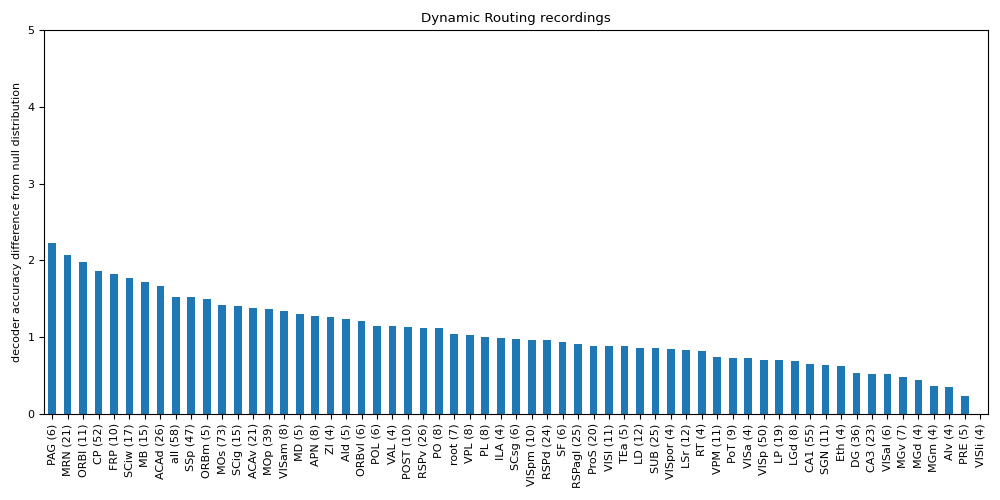

In [26]:
fig,ax=plt.subplots(figsize=(10,5))
area_std_diff_df=pd.DataFrame.from_dict(area_std_diff,orient='index',columns=['std_diff'])
area_std_diff_df['n_recs']=n_recs
area_std_diff_df.sort_values(by='std_diff',ascending=False,inplace=True)
area_label=[]
for aa in area_std_diff_df.index:
    area_label.append(aa+' ('+str(n_recs[aa])+')')

area_std_diff_df['std_diff'].plot.bar(ax=ax)
ax.set_ylabel('decoder accuracy difference from null distribution')
ax.set_xticklabels(area_label)
ax.set_title('Dynamic Routing recordings')
ax.set_ylim([0,5])
fig.tight_layout()


In [31]:
dr_results

,session_id,project,structure,percentile_95,percentile_99,diff_in_stdev,n_units,block_multiplier,null_distribution_median,null_distribution_std,test_distribution_median,test_minus_null
226,626791_2022-08-15,DynamicRouting,all,0.894686,0.929641,0.883174,1608,2,0.788494,0.057090,0.838914,0.050420
227,626791_2022-08-15,DynamicRouting,CA1,0.761993,0.817486,0.776535,171,2,0.638388,0.058199,0.683582,0.045194
228,626791_2022-08-15,DynamicRouting,CP,0.738727,0.768343,0.381564,155,2,0.637627,0.047175,0.655628,0.018000
229,626791_2022-08-15,DynamicRouting,LGd,0.766046,0.791223,-0.032429,136,2,0.663809,0.055152,0.662020,-0.001789
230,626791_2022-08-15,DynamicRouting,MOs,0.851858,0.913094,-0.214865,133,2,0.718523,0.063855,0.704803,-0.013720
...,...,...,...,...,...,...,...,...,...,...,...,...
8273,690706_2023-11-30,DynamicRouting,IGL,0.728529,0.754897,3.188235,27,2,0.613801,0.065495,0.822615,0.208814
8274,690706_2023-11-30,DynamicRouting,RSPv,0.772964,0.804312,0.766808,27,2,0.637251,0.073135,0.693332,0.056081
8275,690706_2023-11-30,DynamicRouting,DG,0.799968,0.843563,2.117251,23,2,0.659407,0.074903,0.817995,0.158589
8276,690706_2023-11-30,DynamicRouting,PRE,0.727201,0.788486,0.036214,23,2,0.581332,0.063360,0.583626,0.002295


In [38]:
dr_results['test_minus_null']=dr_results['test_distribution_median']-dr_results['null_distribution_median']

n_recs_threshold=4
area_median_diff={}
n_recs={}

for aa in dr_results['structure'].unique():
    
    if aa.islower():
        continue

    n_recs[aa]=len(dr_results.query('structure==@aa'))

    median_diff=(
        np.mean(dr_results.query('structure==@aa')['test_minus_null'])
    )
    if n_recs[aa]>=n_recs_threshold:
        area_median_diff[aa]=median_diff
    else:
        continue

area_median_diff

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_9808\2082839398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_results['test_minus_null']=dr_results['test_distribution_median']-dr_results['null_distribution_median']


{'CA1': 0.03710953539598188,
 'CP': 0.09879832492825408,
 'LGd': 0.04235640529455066,
 'MOs': 0.07833716413725443,
 'VISpm': 0.057174359647053016,
 'PO': 0.06568642727270298,
 'VPM': 0.043644830604844226,
 'LP': 0.0399889873257403,
 'DG': 0.029994376217129994,
 'LD': 0.05675132974868025,
 'RSPd': 0.058567163054804174,
 'ZI': 0.07427592051432505,
 'MOp': 0.0795449271228432,
 'PoT': 0.04007328759686257,
 'VISp': 0.03978888181117799,
 'VISam': 0.07667445456469478,
 'TEa': 0.05007069984814254,
 'SGN': 0.03409463449610946,
 'VISli': -0.02216756903103992,
 'SUB': 0.04657362961347017,
 'AId': 0.07216648599360118,
 'AIv': 0.018205083336309463,
 'PRE': 0.012409761222065075,
 'LSr': 0.037616736703719594,
 'RSPv': 0.06310389720173716,
 'SF': 0.04734220761091312,
 'MRN': 0.11907159739459518,
 'POL': 0.05990661531019396,
 'POST': 0.06257124601917746,
 'VISa': 0.038152011115866025,
 'RSPagl': 0.05231727742747668,
 'ILA': 0.04845724044099792,
 'ORBm': 0.07113830606309038,
 'VISl': 0.04905859406810176

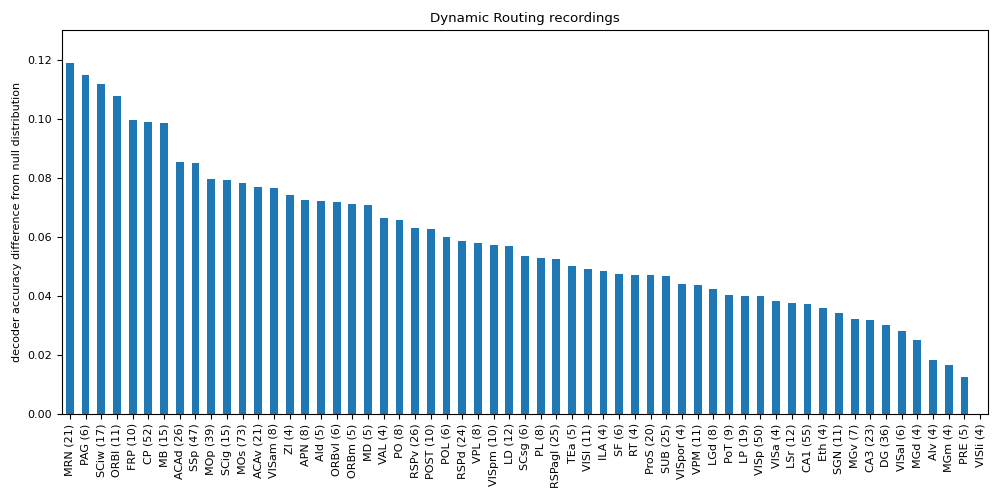

In [39]:

fig,ax=plt.subplots(figsize=(10,5))
area_median_diff_df=pd.DataFrame.from_dict(area_median_diff,orient='index',columns=['median_diff'])
area_median_diff_df['n_recs']=n_recs
area_median_diff_df.sort_values(by='median_diff',ascending=False,inplace=True)
area_label=[]
for aa in area_median_diff_df.index:
    area_label.append(aa+' ('+str(n_recs[aa])+')')

area_median_diff_df['median_diff'].plot.bar(ax=ax)
ax.set_ylabel('decoder accuracy difference from null distribution')
ax.set_xticklabels(area_label)
ax.set_title('Dynamic Routing recordings')
ax.set_ylim([0,0.13])
fig.tight_layout()

In [8]:

for ii,ff in enumerate(decoder_results[:1]):

    # ff=decoder_results[0]
    if ff.endswith('.pkl'):
        with open(os.path.join(loadpath,ff),'rb') as handle:
            svc_results=pickle.load(handle)
        print(ff)
    else:
        continue



620263_2022-07-27_0_exponential_shuffled_blocks.pkl


Text(0.5, 0.98, 'exponential distribution of block lengths')

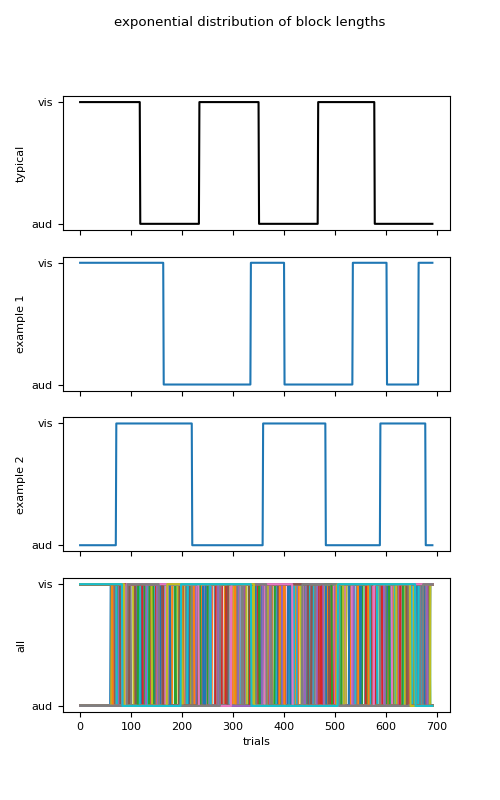

In [24]:
block_multiplier=1

x=np.random.randint(0,100,1)
y=np.random.randint(0,100,1)

shuffle_blocks=np.vstack(svc_results[block_multiplier]['pred_var_pseudo'])=='vis'
actual_blocks=np.vstack(svc_results[block_multiplier]['pred_var'])=='vis'

fig,ax=plt.subplots(4,1,figsize=(5,8),sharex=True)
ax[0].plot(actual_blocks,'k-')
ax[1].plot(shuffle_blocks[x][0])
ax[2].plot(shuffle_blocks[y][0])
ax[3].plot(shuffle_blocks.T)

ax[0].set_yticks([0,1])
ax[0].set_yticklabels(['aud','vis'])
ax[0].set_ylabel('typical')
ax[1].set_yticks([0,1])
ax[1].set_yticklabels(['aud','vis'])
ax[1].set_ylabel('example 1')
ax[2].set_yticks([0,1])
ax[2].set_yticklabels(['aud','vis'])
ax[2].set_ylabel('example 2')
ax[3].set_yticks([0,1])
ax[3].set_yticklabels(['aud','vis'])
ax[3].set_ylabel('all')
ax[3].set_xlabel('trials')
# fig.suptitle('block multiplier = '+str(block_multiplier))
fig.suptitle('exponential distribution of block lengths')

In [ ]:
svc_results['session_info'].id


In [ ]:
session=DynamicRoutingSession(svc_results['session_info'].id)
session.trials[:].columns

In [12]:
block_multiplier=1

num_blocks=[]
block_duration_all=[]
for xx in range(0,100):
    block_switches=np.where(svc_results[block_multiplier]['pred_var_pseudo'][xx][1:]!=svc_results[block_multiplier]['pred_var_pseudo'][xx][:-1])[0]
    block_switch_times=session.trials[:]['stim_start_time'].values[block_switches]
    num_blocks.append(len(block_switches)+1)
    block_duration=np.diff(np.hstack([session.trials[:]['stim_start_time'].iloc[0],block_switch_times,session.trials[:]['stim_start_time'].iloc[-1]]))
    for nn in range(0,len(block_duration)):
        block_duration_all.append(block_duration[nn])

# num_blocks
# block_length
fig,ax=plt.subplots(2,1)
ax[0].hist(num_blocks)
ax[0].set_xlabel('number of blocks')
ax[1].hist(block_duration_all,bins=5)
ax[1].axvline(np.median(block_duration_all),color='r')
ax[1].set_xlabel('block duration (seconds)')

fig.suptitle('block multiplier = '+str(block_multiplier))
fig.tight_layout()

NameError: name 'session' is not defined

In [ ]:
np.median(block_duration_all)/60

In [ ]:
block_multiplier=2

num_blocks=[]
block_length=[]
for xx in range(0,100):
    block_switches=np.where(svc_results[block_multiplier]['pred_var_pseudo'][xx][1:]!=svc_results[block_multiplier]['pred_var_pseudo'][xx][:-1])[0]
    num_blocks.append(len(block_switches)+1)
    block_lengths=np.diff(np.hstack([0,block_switches,len(svc_results[block_multiplier]['pred_var_pseudo'][xx])]))
    for nn in range(0,len(block_lengths)):
        block_length.append(block_lengths[nn])

# num_blocks
# block_length
fig,ax=plt.subplots(2,1)
ax[0].hist(num_blocks)
ax[0].set_xlabel('number of blocks')
ax[1].hist(block_length)
ax[1].set_xlabel('block length (trials)')

fig.suptitle('block multiplier = '+str(block_multiplier))
fig.tight_layout()

In [ ]:
block_multiplier=1
# shuffle_rep=0

pct_true_labels=[]
rep_coefs=[]

for shuffle_rep in range(0,100):
    pct_true_labels.append(np.mean(svc_results[block_multiplier]['pred_var_pseudo'][shuffle_rep]==svc_results[block_multiplier]['pred_var'][shuffle_rep]))
    rep_coefs.append(np.mean(np.vstack(svc_results[block_multiplier]['all']['pseudo'][shuffle_rep]['coefs']),axis=0))

pct_true_labels=np.hstack(pct_true_labels)
rep_coefs=np.vstack(rep_coefs)

In [ ]:
corr_r=np.full((rep_coefs.shape[1]),fill_value=np.nan)
corr_p=np.full((rep_coefs.shape[1]),fill_value=np.nan)

for xx in range(0,rep_coefs.shape[1]):
    corr_r[xx],corr_p[xx]=st.pearsonr(rep_coefs[:,xx],pct_true_labels)



In [ ]:
xbins=np.arange(-1,1.1,0.1)
fig,ax=plt.subplots(1,1)
ax.hist(corr_r,bins=xbins,alpha=0.5)

ax.hist(corr_r[(corr_p<0.05)&(corr_r>0)],bins=xbins,alpha=0.5)

ax.set_xlabel('correlation between coefficient value and percent true labels')

In [ ]:
pct_true_labels

In [ ]:
# fig,ax=plt.subplots(1,1)
# ax.plot(pct_true_labels,rep_coefs[:,1],'k.')


In [ ]:
shuffle_blocks[x][0]

In [ ]:
dr_results.query('structure=="MRN"')

In [ ]:
3.6e+3

In [5]:
## plot trial-by-trial decoder confidence vs. shuffle
sel_area='all'

block_multiplier=1

pseudo_decision_functions=[]
real_decision_functions=[]
for xx in range(0,100):
    pseudo_decision_functions.append(svc_results[block_multiplier][sel_area]['pseudo'][xx]['decision_function'])
    real_decision_functions.append(svc_results[block_multiplier][sel_area]['real'][xx]['decision_function'])

pseudo_decision_functions=np.vstack(pseudo_decision_functions)
real_decision_functions=np.vstack(real_decision_functions)

# pseudo_decision_functions=pseudo_decision_functions
# real_decision_functions=real_decision_functions

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 692 and the array at index 1 has size 3

In [ ]:
fig,ax=plt.subplots(1,1)

ax.plot(np.nanmedian(pseudo_decision_functions,axis=0),alpha=0.5)
ax.plot(np.nanmedian(real_decision_functions,axis=0),alpha=0.5)
ax.axhline(0,color='k',linestyle='--')
ax.set_xlabel('trial number')
ax.set_ylabel('decision function')
ax.set_title(svc_results['session_info'].id + '; area=' + sel_area + '; block multiplier='+str(block_multiplier))
fig.tight_layout()

In [ ]:
svc_results[1]['pred_var']

In [29]:
dr_results

,session_id,project,structure,percentile_95,percentile_99,diff_in_stdev,n_units,block_multiplier,null_distribution_median,null_distribution_std,test_distribution_median
226,626791_2022-08-15,DynamicRouting,all,0.894686,0.929641,0.883174,1608,2,0.788494,0.057090,0.838914
227,626791_2022-08-15,DynamicRouting,CA1,0.761993,0.817486,0.776535,171,2,0.638388,0.058199,0.683582
228,626791_2022-08-15,DynamicRouting,CP,0.738727,0.768343,0.381564,155,2,0.637627,0.047175,0.655628
229,626791_2022-08-15,DynamicRouting,LGd,0.766046,0.791223,-0.032429,136,2,0.663809,0.055152,0.662020
230,626791_2022-08-15,DynamicRouting,MOs,0.851858,0.913094,-0.214865,133,2,0.718523,0.063855,0.704803
...,...,...,...,...,...,...,...,...,...,...,...
8273,690706_2023-11-30,DynamicRouting,IGL,0.728529,0.754897,3.188235,27,2,0.613801,0.065495,0.822615
8274,690706_2023-11-30,DynamicRouting,RSPv,0.772964,0.804312,0.766808,27,2,0.637251,0.073135,0.693332
8275,690706_2023-11-30,DynamicRouting,DG,0.799968,0.843563,2.117251,23,2,0.659407,0.074903,0.817995
8276,690706_2023-11-30,DynamicRouting,PRE,0.727201,0.788486,0.036214,23,2,0.581332,0.063360,0.583626


In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
area_sig_decoding_df=pd.DataFrame.from_dict(area_significant_decoding,orient='index',columns=['sig_decoding'])
area_sig_decoding_df['n_recs']=n_recs
area_sig_decoding_df.sort_values(by='sig_decoding',ascending=False,inplace=True)
area_label=[]
for aa in area_sig_decoding_df.index:
    area_label.append(aa+' ('+str(n_recs[aa])+')')

area_sig_decoding_df['sig_decoding'].plot.bar(ax=ax)
ax.set_ylabel('rate of significant context decoding')
ax.set_xticklabels(area_label)
ax.set_title('Dynamic Routing recordings')
fig.tight_layout()


C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_9808\391965102.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_results['structure']=dr_results['structure'].str.replace('_probe'+ii,'')
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_9808\391965102.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_results['test_minus_null']=dr_results['test_distribution_median']-dr_results['null_distribution_median']


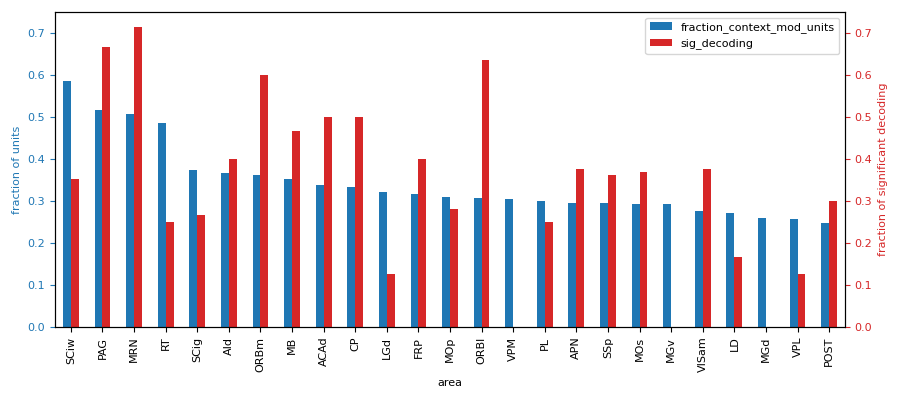

In [62]:
#comparison plot with fraction affected
dr_results=results_df.query('project.str.contains("DynamicRouting") and block_multiplier==2')
#remove the "_probe" from the area name
for ii in ['A','B','C','D','E','F']:
    dr_results['structure']=dr_results['structure'].str.replace('_probe'+ii,'')

dr_results['test_minus_null']=dr_results['test_distribution_median']-dr_results['null_distribution_median']

n_recs_threshold=4
area_significant_decoding={}
n_recs={}
for aa in dr_results['structure'].unique():
    if aa.islower():
        continue
    n_recs[aa]=len(dr_results.query('structure==@aa'))
    sig_decoding=(
        np.mean(dr_results.query('structure==@aa')['test_distribution_median']>
        dr_results.query('structure==@aa')['percentile_95'])
    )
    if n_recs[aa]>=n_recs_threshold:
        area_significant_decoding[aa]=sig_decoding
    else:
        continue

area_sig_decoding_df=pd.DataFrame.from_dict(area_significant_decoding,orient='index',columns=['sig_decoding'])

area_fraction_stim_vs_baseline_context_mod=pd.read_csv(
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\single unit metrics\combined\baseline vs stimulus context mod.csv",
)

area_fraction_stim_vs_baseline_context_mod=area_fraction_stim_vs_baseline_context_mod.merge(right=area_sig_decoding_df,left_on='area',right_index=True,how='left')

area_fraction_stim_vs_baseline_context_mod['fraction_context_mod_units']=area_fraction_stim_vs_baseline_context_mod[['baseline','both']].sum(axis=1)
area_fraction_stim_vs_baseline_context_mod

fig,ax=plt.subplots(1,1,figsize=(9,4))

sorted_df=area_fraction_stim_vs_baseline_context_mod.query('total_n>=40 and n_sessions>=4 and not area.str.islower() and \
                                                           not fraction_context_mod_units.isna() and not sig_decoding.isna()'
                                                           ).sort_values(by='fraction_context_mod_units',ascending=False).head(25)
# sorted_df=area_fraction_stim_vs_baseline_context_mod.query('total_n>=40 and n_sessions>=4 and not area.str.islower() and \
#                                                            not fraction_context_mod_units.isna() and not sig_decoding.isna()'
#                                                            ).sort_values(by='sig_decoding',ascending=False).head(25)
sorted_df.plot.bar(ax=ax,x='area',y=['fraction_context_mod_units','sig_decoding'],color=['tab:blue','tab:red'])
ax.set_ylabel('fraction of units')
ax.yaxis.label.set_color('tab:blue')
ax.tick_params(axis='y', colors='tab:blue')
twin1=ax.twinx()
twin1.set_ylim(ax.get_ylim())
twin1.set_ylabel('fraction of significant decoding')
twin1.yaxis.label.set_color('tab:red')
twin1.tick_params(axis='y', colors='tab:red')

fig.tight_layout()


In [41]:
area_sig_decoding_df

,sig_decoding
CA1,0.090909
CP,0.500000
LGd,0.125000
MOs,0.369863
VISpm,0.200000
PO,0.125000
VPM,0.000000
LP,0.105263
DG,0.111111
LD,0.166667
